<a href="https://colab.research.google.com/github/Yashasvi2003/Machine-Learning-Algorithms/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB ##gaussiannb is a variant of naive bayes thta assumes that the features follow a normal distribution
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("Wine Quality Dataset.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(df.isnull().sum) ##check for any missing values

<bound method DataFrame.sum of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
4893          False             False        False           False      False   
4894          False             False        False           False      False   
4895          False             False        False           False      False   
4896          False             False        False           False      False   
4897          False             False        False           False      False 

In [5]:
##split the dataset into features (X) and target(Y)
x=df.drop('quality',axis=1) ##all columns excepts quality are features
y=df["quality"] #quality is the target variable

In [7]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
#initialize the gaussian naive bayes classifier
gnb=GaussianNB()

#train the model
gnb.fit(x_train, y_train)

#make predictions on the test set
y_pred=gnb.predict(X_test)

#evaluate the model's performance
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#print the confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#print the classification report
classification_rep=classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.4387755102040816
Confusion Matrix:
[[  2   0   1   2   0   0   0]
 [  1   6   8   6   4   0   0]
 [  7  14 155  79  36   0   0]
 [  4   5 117 144 159   2   1]
 [  0   0  22  41 123   6   0]
 [  0   1   2   5  27   0   0]
 [  0   0   0   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.14      0.40      0.21         5
           4       0.23      0.24      0.24        25
           5       0.51      0.53      0.52       291
           6       0.52      0.33      0.41       432
           7       0.35      0.64      0.45       192
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         0

    accuracy                           0.44       980
   macro avg       0.25      0.31      0.26       980
weighted avg       0.46      0.44      0.43       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

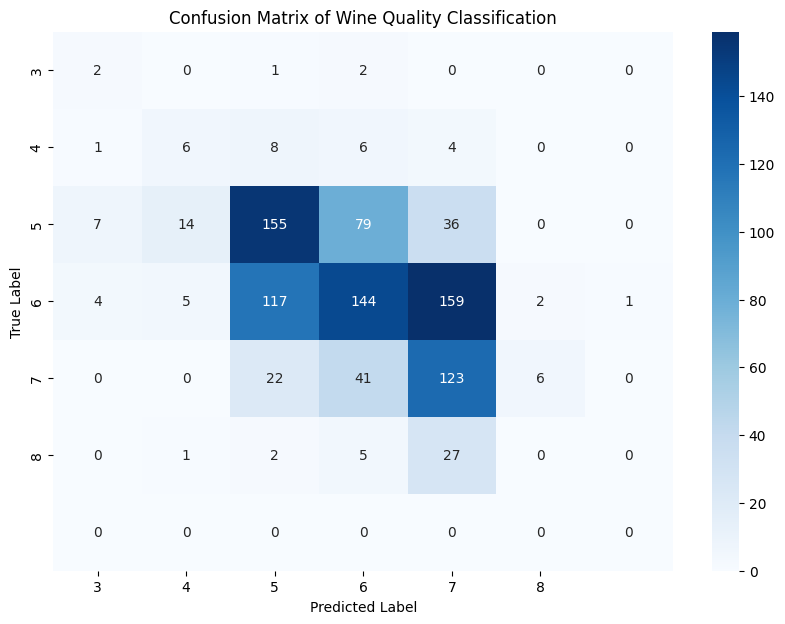

In [10]:
#Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix of Wine Quality Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()